# Analizing one run of the EA

# Preliminaries
## Importing packages

In [1]:
import numpy as np

import seaborn as sns
#sns.set()
#sns.set_style('whitegrid')
#sns.set_context('notebook')
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

from thesis_EAfunc import *
from thesis_visfunc import *

In [2]:
import datetime
time_a = datetime.datetime.now()
print(time_a)

2019-05-12 09:55:54.951565


# Define landscape

In [3]:
#Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

#Known minimum
x_point = -6
y_point = 9

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

#Problem definition
import math
def g(x,y):
    mag = np.sqrt(x**2. + y**2.)
    return -(50.*np.sinc(mag/np.pi) - mag)

def f(x, y):
    x_min = -6.01717
    y_min = 9.06022
    f_min = g(x_min+11., y_min+9.) + g(x_min-11., y_min-3.) + g(x_min+6., y_min-9.)
    tripsinc = g(x+11., y+9.) + g(x-11., y-3.) + g(x+6., y-9.) - (f_min)
    return tripsinc

#Testing the minimum
print(f(-1,-1), f(-11,-9), f(11,3), f(-6,9))
print(g(-6+11,9+9) + g(-6-11,9-3) + g(0,0))
print()
print(f(-1.,-1.), f(-11.,-9.), f(11.,3.), f(-6.,9.))
print(f(-6,9), f(-6.019047, 9.056596), f(-6.0174146,9.0600913), f(-6.01717, 9.06022))
print(g(-6.+11.,9.+9.) + g(-6.-11.,9.-3.) + g(-6+6.,-9+9.))
print(g(5.,18.), g(-17.,6.), g(-0.,-0))

50.62059878583003 5.177364279021976 6.107247239602234 0.031278340140559635
-10.811899440809476

50.62059878583003 5.177364279021976 6.107247239602234 0.031278340140559635
0.031278340140559635 0.00020359700695138372 1.217499288941326e-06 0.0
-10.811899440809476
19.129108799305133 20.05899175988539 -50.0


## Visualizing Landscape

In [4]:
#Visualization parameters
grph_steps = 61
a=15
b=-60
ratio_w=1.3
ln=.75

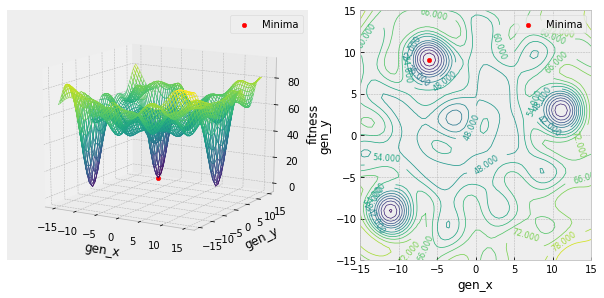

In [5]:
EA_plt_land(f, domain, point, grph_steps, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

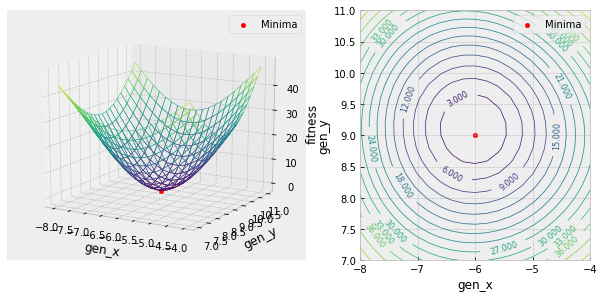

In [6]:
domain_min=(-8,-4,7,11)
EA_plt_land(f, domain_min, point, 21, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

# Running the Evolutionary Algorithm
## Setting the EA's parameters

In [7]:
#starting seed
np.random.seed(654321)

In [8]:
#Algorithm parameters
## Number of experiments, and generations per experiment
exp_n = 1
gen_f = 50

## Population size
pop_s = 20

## Parent subpopulation's selection method and size
par_selection = 'fitness_proportional_selection'
par_s = 60

## Progeny subpopulation's and size
prog_s = par_s
### Crossover Method
crossover = 'uniform'
### Mutation method, probability and size
mutation = 'random_all_gau_dis'
mut_p = 0.5
mut_s = 2.5

## New population selection method
population_new='tournament_k3'

## We run the EA for 1 generation

run_n = 0
birthcounter = 0

population, generations, birthcounter, gen_n = EA_start(pop_s, domain, f, birthcounter)

for i in range(gen_f):
    birthcounter, progeny = EA_prog(population, par_s, prog_s, birthcounter, gen_n, mut_p, mut_s, domain, f, par_selection, crossover, mutation)
    generations = EA_prog_to_df(generations, progeny)
    gen_n, population, progeny = EA_new_population(population, progeny, gen_n, pop_s, f, population_new)
    generations = EA_pop_to_df(generations, population)

fitness = EA_fitn_summary(generations)

In [9]:
%%time
genera_res, fitness_res = EA_exp(exp_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

Wall time: 2.02 s


In [10]:
z=gen_f
query = (genera_res['generation']==z)
genera_res[query]

,run,generation,birthdate,function,fitness,gen_x,gen_y
4000,0,50.0,2992.0,population,0.003916,-6.00148,9.062488
4001,0,50.0,2992.0,population,0.003916,-6.00148,9.062488
4002,0,50.0,2918.0,population,0.003916,-6.00148,9.062488
4003,0,50.0,2989.0,population,0.003916,-6.00148,9.062488
4004,0,50.0,2998.0,population,0.003916,-6.00148,9.062488
4005,0,50.0,2794.0,population,0.003916,-6.00148,9.062488
4006,0,50.0,2990.0,population,0.003916,-6.00148,9.062488
4007,0,50.0,2902.0,population,0.003916,-6.00148,9.062488
4008,0,50.0,2992.0,population,0.003916,-6.00148,9.062488
4009,0,50.0,2918.0,population,0.003916,-6.00148,9.062488


# Visualization
## Fitness development

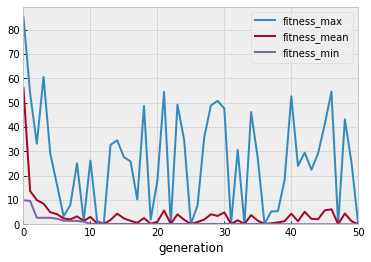

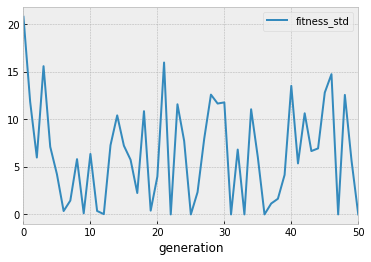

In [11]:
EA_fitn_dev(fitness_res, 0)

## Visualizing initial population and its progeny

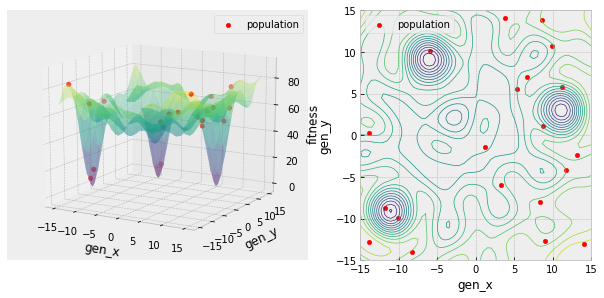

In [12]:
run_s=0  #First (and only) run
gen_s=0  #First generation
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, gen_s, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

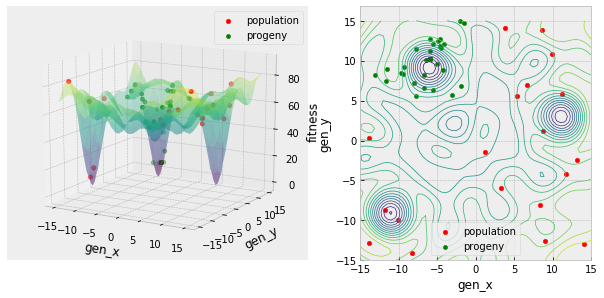

In [13]:
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, gen_s, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

## Checking movement of population

In [14]:
run_s=0  #First (and only) run

Generation 0


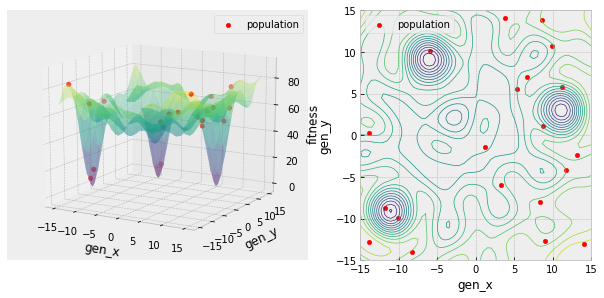

Generation 5


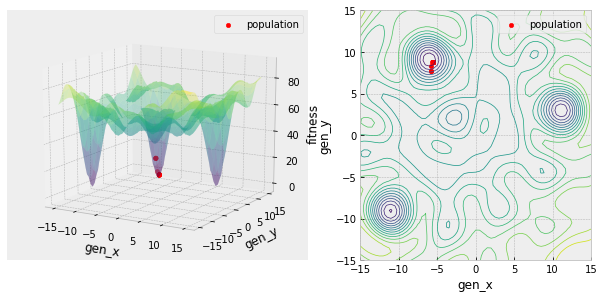

Generation 10


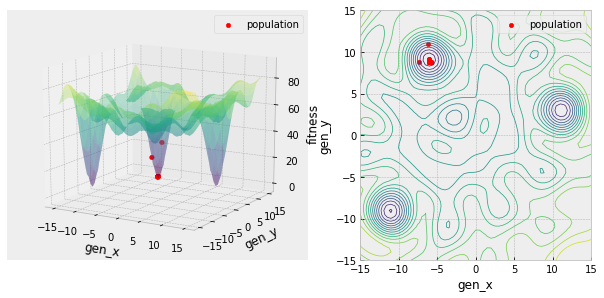

Generation 20


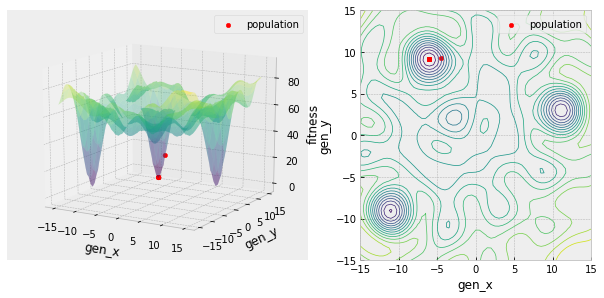

Generation 30


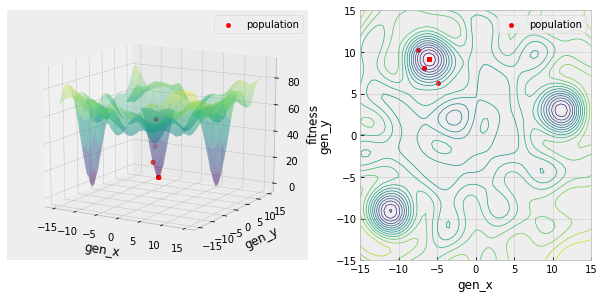

Generation 40


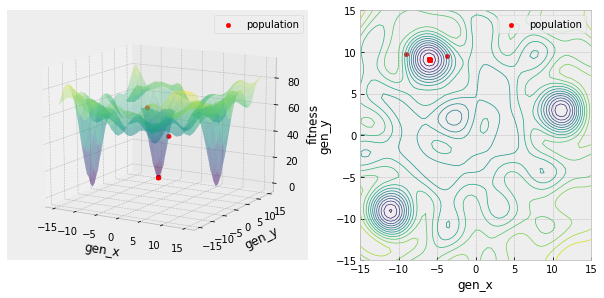

Generation 45


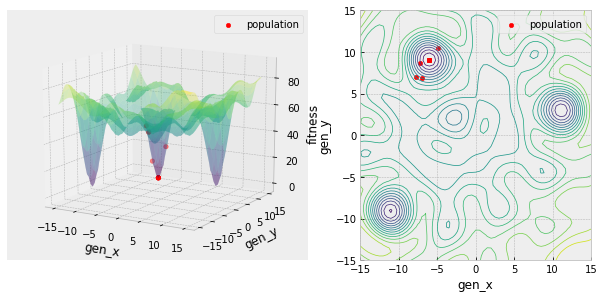

Generation 50


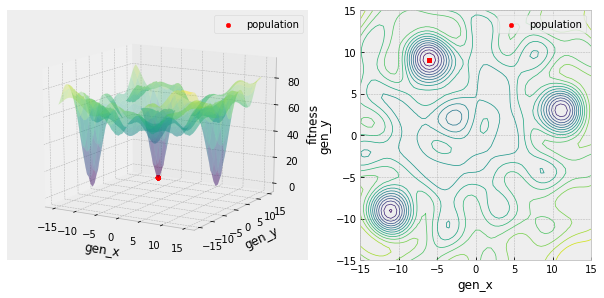

In [15]:
print('Generation 0')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 0, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 5')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 5, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 10')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 10, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 20')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 20, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 30')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 30, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 40')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 40, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 45')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 45, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 50')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 50, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

Generation 0


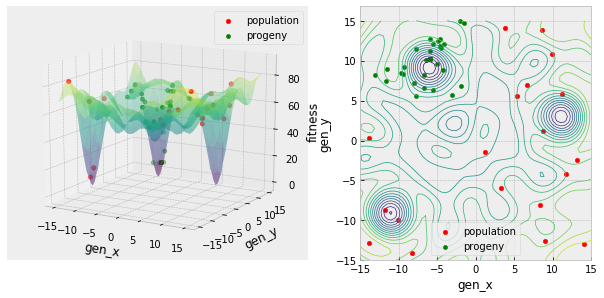

Generation 5


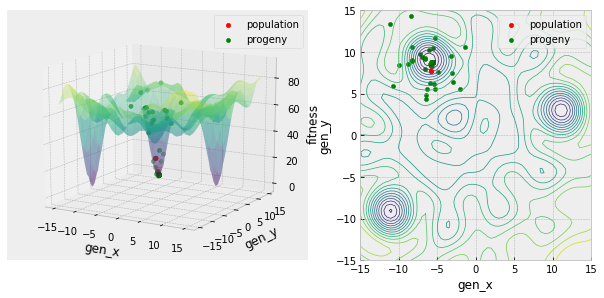

Generation 10


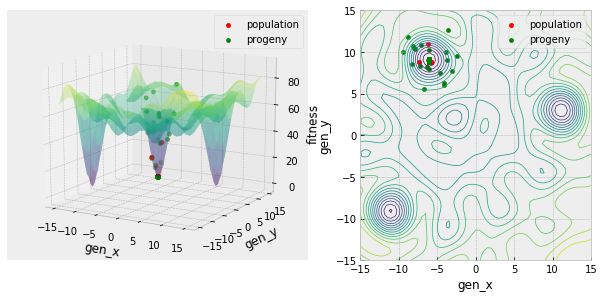

Generation 20


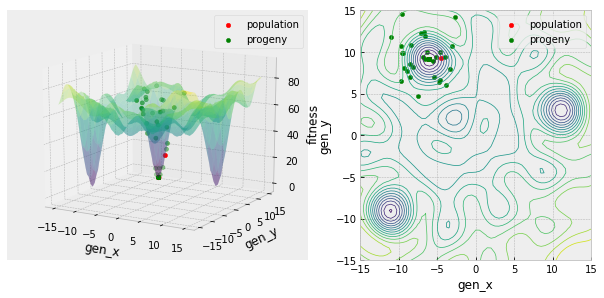

Generation 30


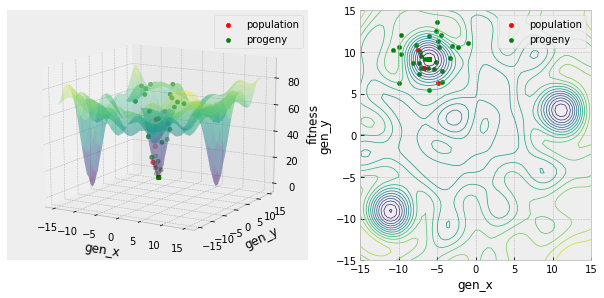

Generation 40


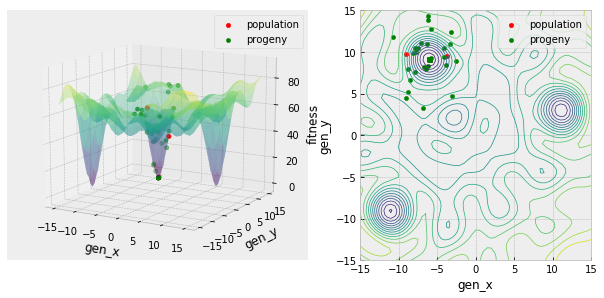

Generation 45


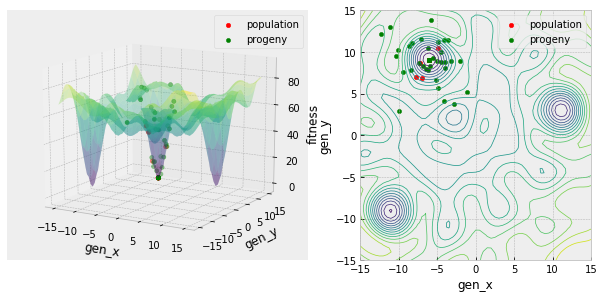

Generation 49


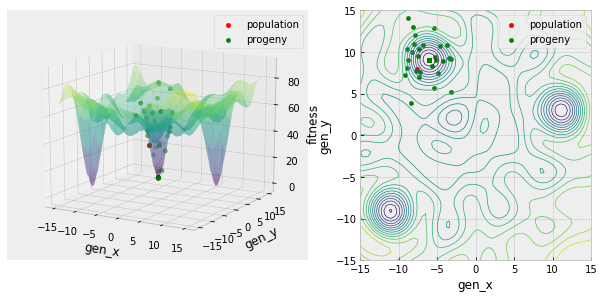

In [16]:
print('Generation 0')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 0, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 5')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 5, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 10')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 10, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 20')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 20, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 30')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 30, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 40')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 40, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 45')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 45, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 49')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 49, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

In [17]:
time_b = datetime.datetime.now()
print(time_b)
print(time_b-time_a)

2019-05-12 09:56:40.011799
0:00:45.060234


In [18]:
z=0
y=1
query = (genera_res['generation']==z)
print(genera_res[query])
print()
query = (genera_res['generation']==y)
print(genera_res[query])

    run  generation  birthdate    function    fitness      gen_x      gen_y
0     0         0.0        5.0  population   9.900762  -5.924811  10.161056
1     0         0.0       16.0  population  10.918587 -11.737858  -8.677137
2     0         0.0       12.0  population  19.375217 -10.062298  -9.951298
3     0         0.0       14.0  population  49.405194   1.178095  -1.412052
4     0         0.0       17.0  population  51.431494   8.789591   1.146479
5     0         0.0        3.0  population  52.891937  11.235965   5.795149
6     0         0.0       10.0  population  53.664424   5.305570   5.571845
7     0         0.0       13.0  population  57.078477   3.233412  -5.991708
8     0         0.0        1.0  population  57.860315   6.711423   6.975910
9     0         0.0        4.0  population  58.865255   9.900312  10.784469
10    0         0.0       15.0  population  60.125746  11.740492  -4.180273
11    0         0.0       19.0  population  62.015153 -13.801689   0.257812
12    0     